In [1]:
import sys
import os
%matplotlib inline

In [2]:
# get current working directory
os.getcwd()
# change directory
os.chdir('../')
os.getcwd()

'/home/romagnolilab/Documents/GitHub/ACTC_MD_ML'

In [3]:
# import libraries
from src.polymerSMILES import polymers
from src.dataProcessing import * #DataPreprocessing #computeTanimotoSimilarity #* #data_load, computeTanimotoSimilarity, get_dissimilarity_map, featurizer, normalizedata

In [4]:
# load smiles
polymers_dict = polymers.get_data() # get rdkit formats of the polymer smiles 


In [5]:
# instantiate data preprocessing toolbox
preprocess = DataPreprocessing()

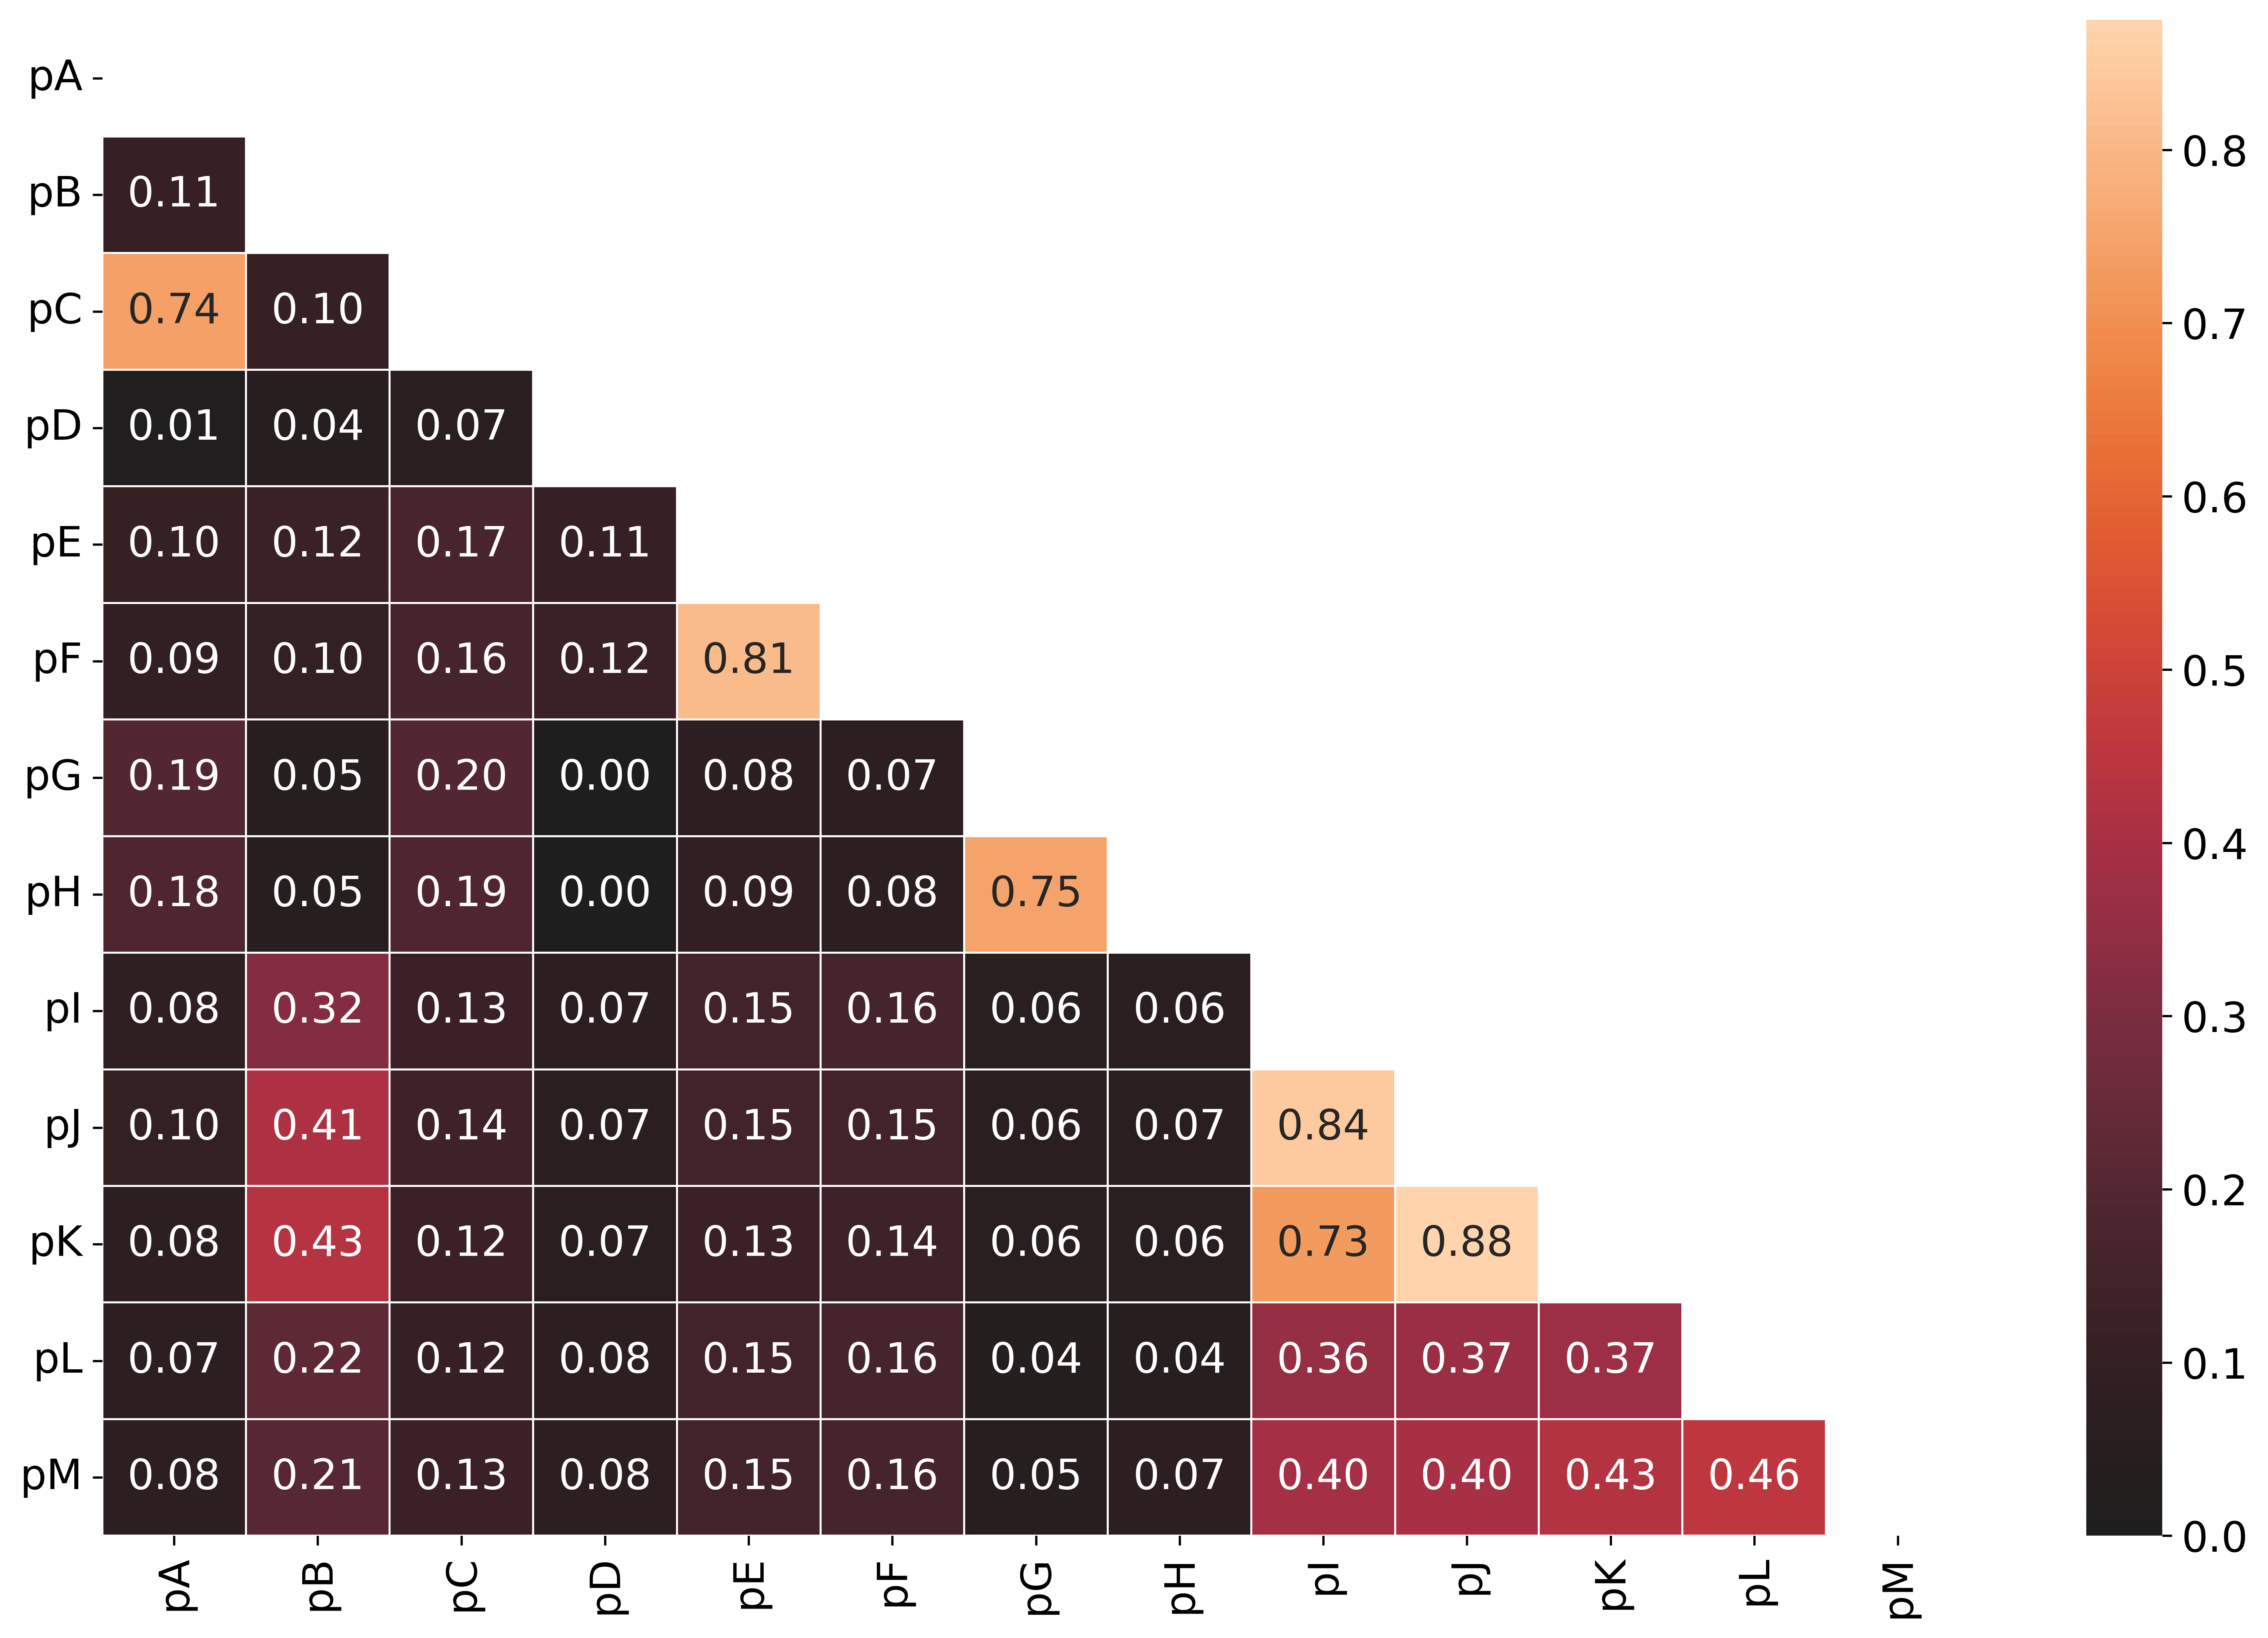

In [6]:
# compute the tanimoto similarity
TanimotoIndex = preprocess.computeTanimotoSimilarity(polymers_dict, 'Tanimoto') 
preprocess.get_dissimilarity_map(TanimotoIndex, title = '', filename = 'heatmap_Tanimoto') # show the heat map

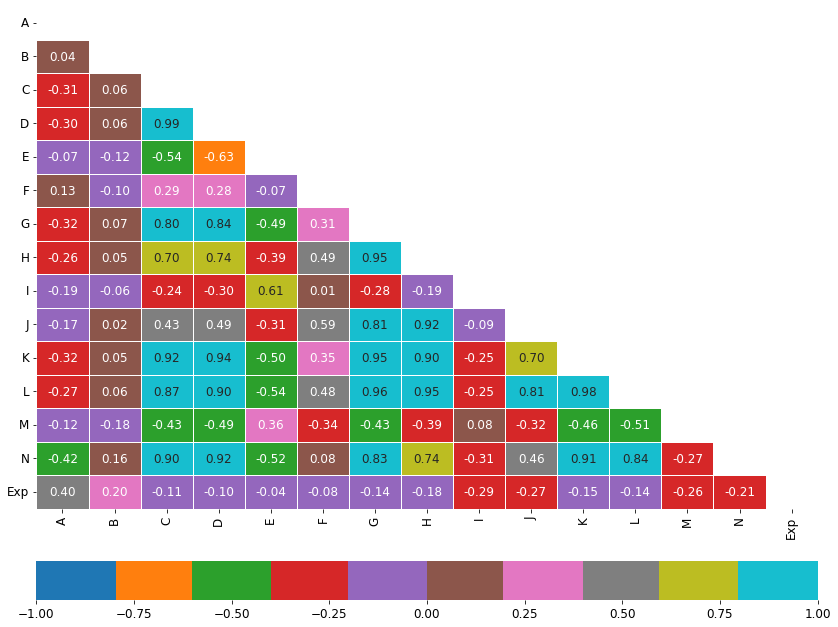

In [7]:
# show importance map
initial_data = preprocess.data_load(filename = "1.0-hkg-MD-ActCoeff-processed-deletedNonZeros.csv")
preprocess.get_importance_feature_map(initial_data, approach = 'pearson') #approach can be {'pearson', 'kendall', 'spearman'}


In [8]:
## featurization of data
data = preprocess.data_load(filename = "1.0-hkg-MD-ActCoeff-processed.csv")
## assign X, y
(X, y, MFprints) = preprocess.featurizer(data, polymers_dict,  'solvation') # descr = 'solvation' or 'activity'
## split and normalize data
(data_solvation_scaler, X_train, X_test, y_train, y_test) = preprocess.normalizedata(X, y, splitRatio=0.2, state = 48, transform = True, property = 'Y')
print(f"X_train, X_test, y_train, & y_test has shapes of {X_train.shape}, {X_test.shape}, {y_train.shape}, & {y_test.shape} respectively.")

X_train, X_test, y_train, & y_test has shapes of (73, 137), (19, 137), (73, 12), & (19, 12) respectively.


In [9]:
data.head()

,#,Name of the polymer,CounterIon,Co-Ion,salt,Water-per-ion,concentration_of_salt_M,gr_minima_Ion_H2O,gr_peak_position_Ion_H2O,gr_peak_height_Ion_H2O,Nr_Ion_H2O,gr_minima_CG_H2O,gr_peak_position_CG_H2O,gr_peak_height_CG_H2O,Nr_CG_H2O_,gr_minima_CG_Ion,gr_peak_position_CG_Ion,gr_peak_height_CG_Ion,Nr_CG_Ion,Exp_act_coeff
0,1,PSbNMP_RCE,I-,K+,KI,6,0.00,4.45,3.65,6.5,4.7,5.4,3.55,2.16,5.3,6.25,4.15,5.6,1.9,-
1,2,PSbNMP_RCE,I-,K+,KI,6,0.02,4.45,3.65,6.5,4.7,5.5,3.55,2.30,6.1,6.15,4.15,5.8,1.9,0.300
2,3,PSbNMP_RCE,I-,K+,KI,6,0.20,4.45,3.65,6.3,4.6,5.5,3.55,1.90,5.0,6.15,4.15,5.8,2.0,0.319
3,4,PSbNMP_RCE,I-,K+,KI,6,0.50,4.45,3.65,6.2,4.6,5.5,3.55,1.80,4.5,6.15,4.15,5.6,2.2,0.476
4,5,PSbNMP_RCE,I-,K+,KI,6,1.00,4.55,3.65,6.0,4.7,5.0,3.55,1.50,3.0,6.15,4.15,5.1,2.5,0.663


In [10]:
# transform features using PCA
print("***********************A1*************************")
pca_X_train_MDFP, pca_X_test_MDFP = preprocess.convertInputsPCA(X_train, X_test, MFprints, type = 'MDFP')
print(f"pca_X_train_MDFP & pca_X_test_MDFP has shapes of {pca_X_train_MDFP.shape}, and {pca_X_test_MDFP.shape}, respectively.")
#
print("***********************A2*************************")
pca_X_train_ALL, pca_X_test_ALL = preprocess.convertInputsPCA(X_train, X_test, MFprints, type = 'All')
print(f"pca_X_train_ALL & pca_X_test_ALL has shapes of {pca_X_train_ALL.shape}, and {pca_X_test_ALL.shape}, respectively.")


***********************A1*************************
pca_X_train_MDFP & pca_X_test_MDFP has shapes of (73, 23), and (19, 23), respectively.
***********************A2*************************
pca_X_train_ALL & pca_X_test_ALL has shapes of (73, 10), and (19, 10), respectively.


# Use model

In [11]:
from src.models import trainedMODELs

In [12]:
model = trainedMODELs()

In [13]:
### SVR
# A0
SVR_A0_results_train, SVR_A0_results_test = model.implementation(model = 'SVR', type_data = 'A0', xtrain = X_train, xtest = X_test)
# A1
SVR_A1_results_train, SVR_A1_results_test = model.implementation(model = 'SVR', type_data = 'A1', xtrain = pca_X_train_MDFP, xtest = pca_X_test_MDFP)
# A2
SVR_A2_results_train, SVR_A2_results_test = model.implementation(model = 'SVR', type_data = 'A2', xtrain = pca_X_train_ALL, xtest = pca_X_test_ALL)

### ANN
# A0
ANN_A0_results_train, ANN_A0_results_test = model.implementation(model = 'ANN', type_data = 'A0', xtrain = X_train, xtest = X_test)
# A1
ANN_A1_results_train, ANN_A1_results_test = model.implementation(model = 'ANN', type_data = 'A1', xtrain = pca_X_train_MDFP, xtest = pca_X_test_MDFP)
# A2
ANN_A2_results_train, ANN_A2_results_test = model.implementation(model = 'ANN', type_data = 'A2', xtrain = pca_X_train_ALL, xtest = pca_X_test_ALL)

### RFR
# A0
RFR_A0_results_train, RFR_A0_results_test = model.implementation(model = 'RFR', type_data = 'A0', xtrain = X_train, xtest = X_test)
# A1
RFR_A1_results_train, RFR_A1_results_test = model.implementation(model = 'RFR', type_data = 'A1', xtrain = pca_X_train_MDFP, xtest = pca_X_test_MDFP)
# A2
RFR_A2_results_train, RFR_A2_results_test = model.implementation(model = 'RFR', type_data = 'A2', xtrain = pca_X_train_ALL, xtest = pca_X_test_ALL)

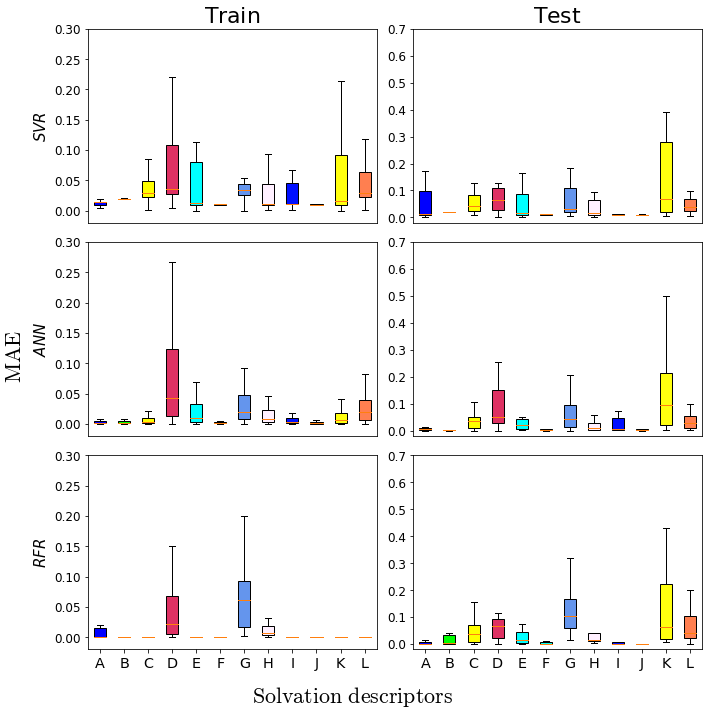

In [14]:
#plot figures
model.plot_box_MAE(ytrain = y_train, 
                        ytest = y_test, 
                            ytrain_pred_list = [SVR_A0_results_train, ANN_A0_results_train, RFR_A0_results_train],
                                ytest_pred_list = [SVR_A0_results_test, ANN_A0_results_test, RFR_A0_results_test],
                                type_data = 'A0', 
                                title = 'performance_A0_MAE_all_models'
                            )

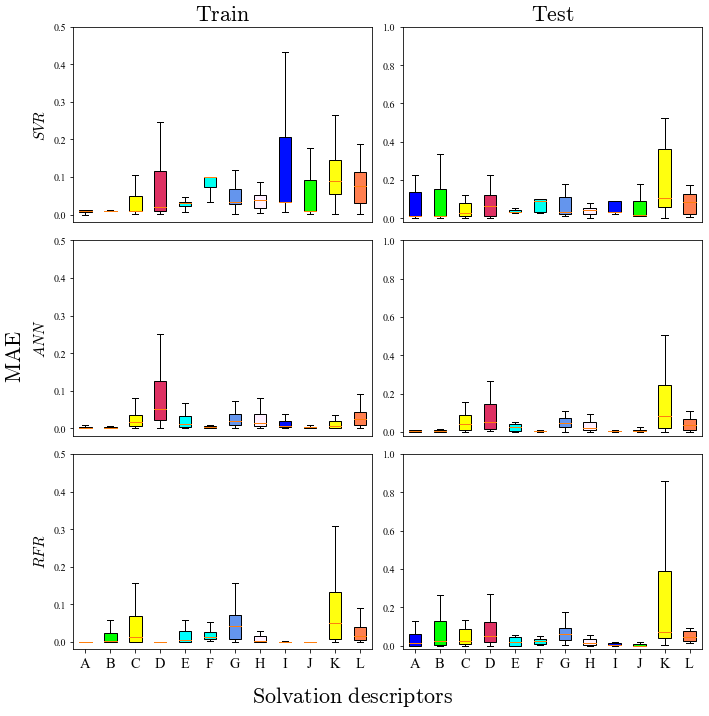

In [15]:
#plot figures
model.plot_box_MAE(ytrain = y_train, 
                        ytest = y_test, 
                            ytrain_pred_list = [SVR_A1_results_train, ANN_A1_results_train, RFR_A1_results_train],
                                ytest_pred_list = [SVR_A1_results_test, ANN_A1_results_test, RFR_A1_results_test],
                                type_data = 'A1', 
                                title = 'performance_A1_MAE_all_models'
                            )

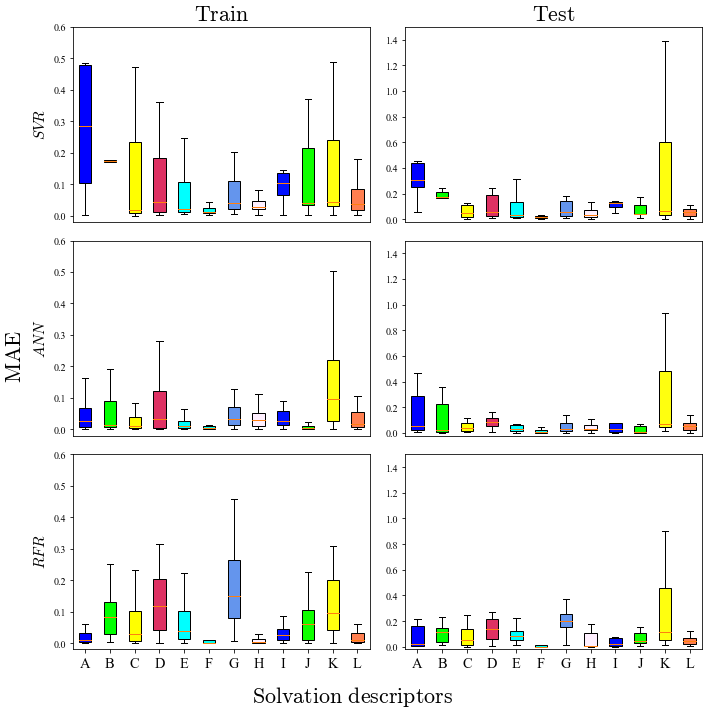

In [16]:
#plot figures
model.plot_box_MAE(ytrain = y_train, 
                        ytest = y_test, 
                            ytrain_pred_list = [SVR_A2_results_train, ANN_A2_results_train, RFR_A2_results_train],
                                ytest_pred_list = [SVR_A2_results_test, ANN_A2_results_test, RFR_A2_results_test],
                                type_data = 'A2', 
                                title = 'performance_A2_MAE_all_models'
                            )